<a href="https://colab.research.google.com/github/drpriyankasharma0305/prediction-of-disease-/blob/main/medical_cost_preditiction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv("/content/medical cost prediction(2).csv")

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
df.shape

(1338, 7)

In [ ]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
print("children unique values: ",df['children'].unique())
print("smoker unique values: ",df['smoker'].unique())
print("region unique values: ",df['region'].unique())


children unique values:  [0 1 3 2 5 4]
smoker unique values:  ['yes' 'no']
region unique values:  ['southwest' 'southeast' 'northwest' 'northeast']


In [ ]:
print(df['sex'].value_counts())
print(df['smoker'].value_counts())
print(df['region'].value_counts())

male      676
female    662
Name: sex, dtype: int64
no     1064
yes     274
Name: smoker, dtype: int64
southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le=LabelEncoder()
df['sex']=le.fit_transform(df['sex'])
df['smoker']=le.fit_transform(df['smoker'])
df['region']=le.fit_transform(df['region'])





In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


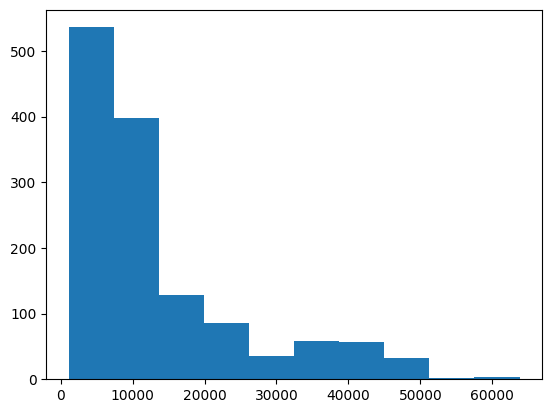

In [ ]:
plt.hist(df['charges'])
plt.show()

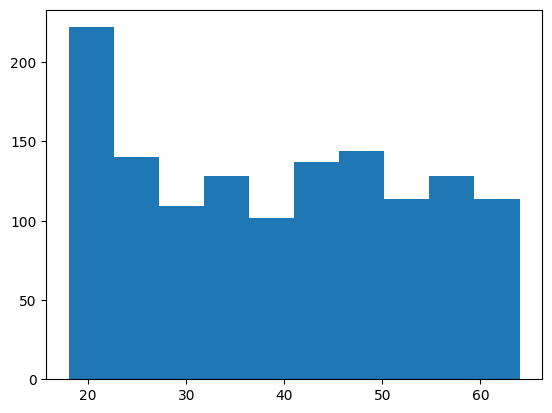

In [ ]:
plt.hist(df['age'])
plt.show()

<Axes: xlabel='sex', ylabel='count'>

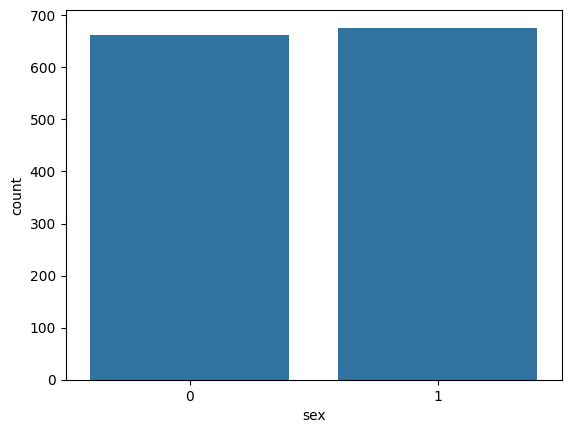

In [ ]:
sns.countplot(df,x='sex')

<Axes: xlabel='smoker', ylabel='count'>

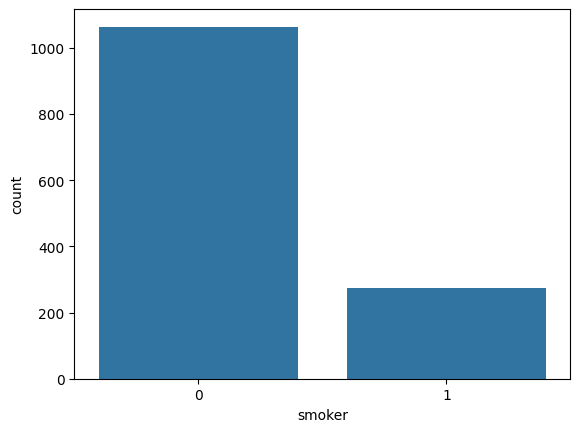

In [ ]:
sns.countplot(df,x='smoker')

<Axes: xlabel='region', ylabel='count'>

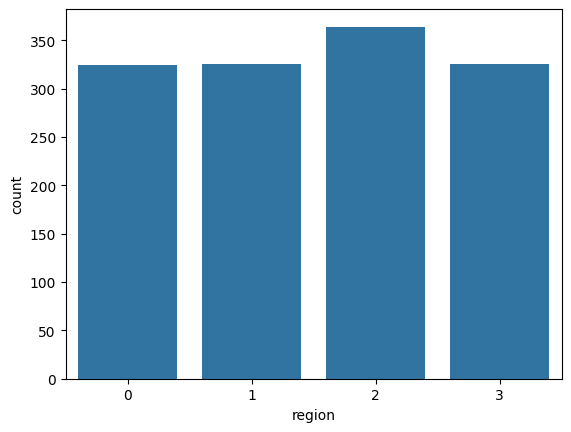

In [ ]:
sns.countplot(df,x='region')

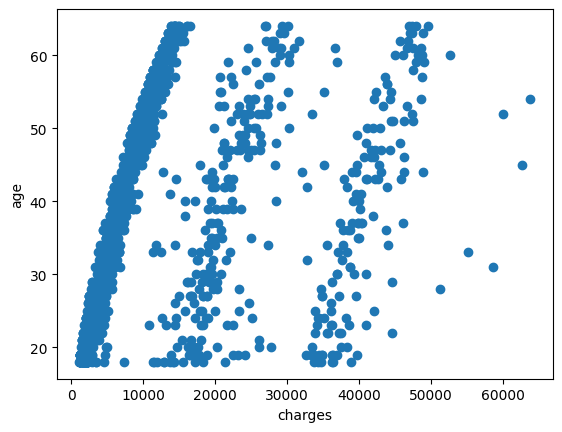

In [ ]:
x=df['charges']
y=df['age']
plt.scatter(x,y)
plt.xlabel("charges")
plt.ylabel("age")
plt.show()

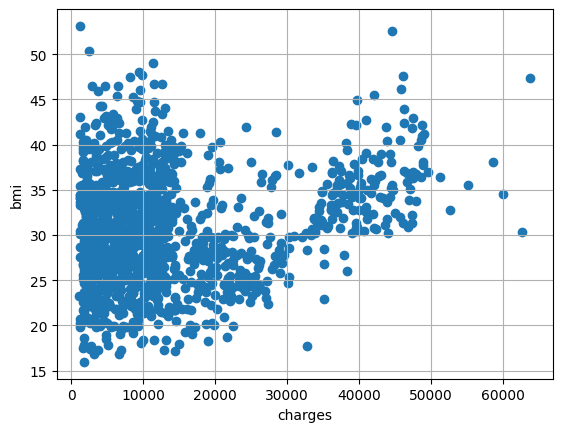

In [ ]:
x=df['charges']
y=df['bmi']
plt.scatter(x,y)
plt.xlabel("charges")
plt.ylabel("bmi")
plt.grid()
plt.show()

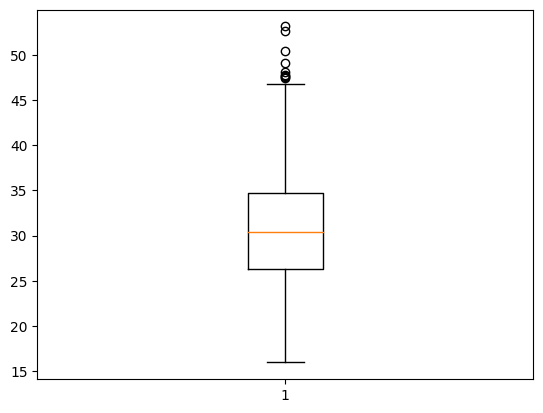

In [ ]:
plt.boxplot(df['bmi'])
plt.show()

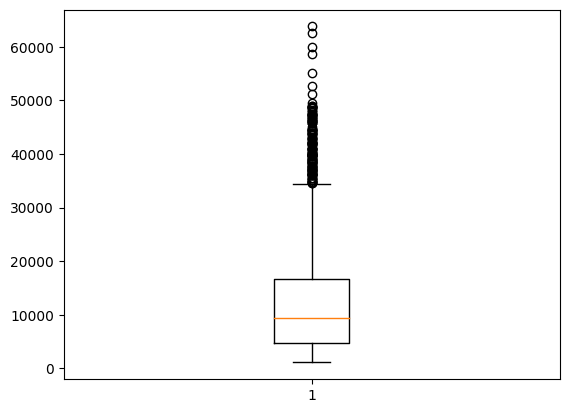

In [ ]:
plt.boxplot(df['charges'])
plt.show()

In [ ]:
percentile_25=df['charges'].quantile(.25)
percentile_75=df['charges'].quantile(.75)


In [ ]:
print(percentile_25,percentile_75)

4740.28715 16639.912515


In [ ]:
iqr=percentile_75-percentile_25
iqr

11899.625365

In [ ]:
lower_limit=percentile_25-1.5*iqr
upper_limit=percentile_75+1.5*iqr
print(lower_limit,upper_limit)


-13109.1508975 34489.350562499996


In [ ]:
ndf=df[(df['charges']>=0) & (df['charges']<=34489.350562499996)]

In [ ]:
ndf.shape

(1199, 7)

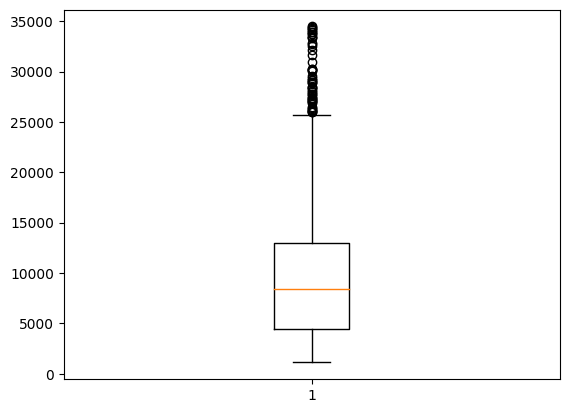

In [ ]:
plt.boxplot(ndf['charges'])
plt.show()

In [ ]:
percentile_25=df['bmi'].quantile(.25)
percentile_75=df['bmi'].quantile(.75)

In [ ]:
print(percentile_25,percentile_75)

26.29625 34.69375


In [ ]:
iqr=percentile_75-percentile_25
iqr

8.3975

In [ ]:
lower_limit=percentile_25-1.5*iqr
upper_limit=percentile_75+1.5*iqr
print(lower_limit,upper_limit)

13.7 47.290000000000006


In [ ]:
ndf=df[(df['bmi']>=14) & (df['bmi']<=48)]

In [ ]:
ndf.shape

(1333, 7)

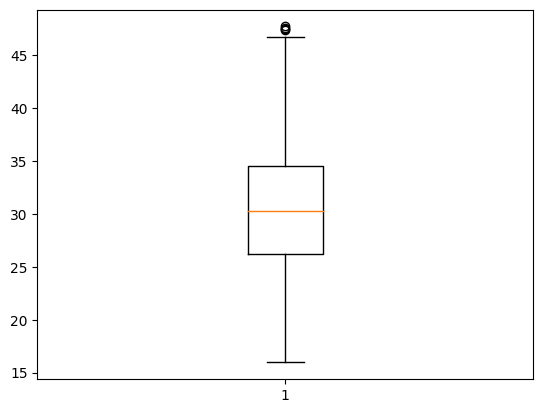

In [ ]:
plt.boxplot(ndf['bmi'])
plt.show()

In [ ]:
corr= df.corr()
corr

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000


<Axes: >

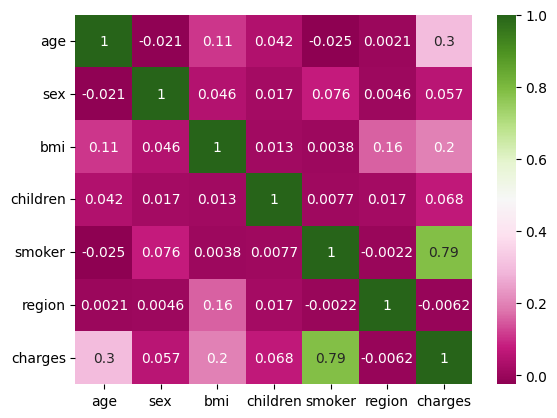

In [ ]:
sns.heatmap(corr,annot=True,cmap='PiYG')

In [ ]:
X=ndf.drop(['charges'],axis=1)
Y=ndf['charges']

In [ ]:
X

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1
1334,18,0,31.920,0,0,0
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,3


In [ ]:
Y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1333, dtype: float64

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=21)

In [ ]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((1066, 6), (1066,), (267, 6), (267,))

In [ ]:
rf=RandomForestRegressor()

In [ ]:
rf.fit(x_train,y_train)

RandomForestRegressor()

In [ ]:
prediction=rf.predict(x_test)

In [ ]:
prediction[:5]

array([14785.149187 , 19613.7214199, 13054.4866386,  7744.781959 ,
       19039.8713471])

In [ ]:
y_test[:5]

131    13616.35860
302    12265.50690
467    12643.37780
228     7358.17565
773    17748.50620
Name: charges, dtype: float64

In [ ]:
error=mean_absolute_error(y_test,prediction)
error

2843.44853206456

In [ ]:
X=ndf.drop(['bmi'],axis=1)
Y=ndf['bmi']

In [ ]:
X

,age,sex,children,smoker,region,charges
0,19,0,0,1,3,16884.92400
1,18,1,1,0,2,1725.55230
2,28,1,3,0,2,4449.46200
3,33,1,0,0,1,21984.47061
4,32,1,0,0,1,3866.85520
...,...,...,...,...,...,...
1333,50,1,3,0,1,10600.54830
1334,18,0,0,0,0,2205.98080
1335,18,0,0,0,2,1629.83350
1336,21,0,0,0,3,2007.94500


In [ ]:
Y

0       27.900
1       33.770
2       33.000
3       22.705
4       28.880
         ...  
1333    30.970
1334    31.920
1335    36.850
1336    25.800
1337    29.070
Name: bmi, Length: 1333, dtype: float64

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=21)

In [ ]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((1066, 6), (1066,), (267, 6), (267,))

In [ ]:
rf=RandomForestRegressor()

In [ ]:
rf.fit(x_train,y_train)

RandomForestRegressor()

In [ ]:
prediction=rf.predict(x_test)

In [ ]:
prediction[:5]

array([34.5154 , 33.567  , 31.01085, 29.76635, 27.9067 ])

In [ ]:
y_test[:5]

131    22.040
302    37.510
467    33.820
228    31.635
773    28.880
Name: bmi, dtype: float64

In [ ]:
error=mean_absolute_error(y_test,prediction)
error

4.539437827715356

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor

In [ ]:
lr=LogisticRegression()

In [ ]:
lr.fit(x_train,y_train)

ValueError: Unknown label type: 'continuous'

In [ ]:
dt=DecisionTreeClassifier()

In [ ]:
dt.fit(x_train,y_train)

ValueError: Unknown label type: 'continuous'